In [1]:
import pandas as pd
import numpy as np
import spotipy
import seaborn as sns
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials, SpotifyOAuth
import requests
import json
import matplotlib.pyplot as plt
import os

# NLTK Import for genres and text preprocessing
from collections import Counter
from nltk import word_tokenize

In [2]:
# Credentials
client_id = '5746b79b7b2d49fd8e00c815bddf7be9'
client_secret = '2032da109bd8475792a4b924181b41f8'
user_id = '5ynv6zmaqpztd1b5bwbqq4de6'
# user_id = '3v86yflxrdv7bndun1pst185b'
redirect_uri = 'http://localhost:5000/callback'
scope = "user-library-read"

In [3]:
# Two different ways of connecting to Spotify API (credentials & authorization)

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spot = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=client_id, client_secret=client_secret, redirect_uri=redirect_uri, scope=scope))

In [4]:
# Creating subdirectory for plots 

path = str(sp.user(user_id)['display_name'])

try:
    os.mkdir(path)
except OSError:
    print("The directory with the name", path, "already exists")
else:
    print("Successfully created the directory %s " % path)

The directory with the name Nasty Nasti already exists


In [5]:
# Get playlist uris

def pl_ids(user_id):
    playlists = sp.user_playlists(user_id)
    pl_uris = []
    for x in playlists['items']:
        pl_uris.append(x['uri'])
    return pl_uris

uris = pl_ids(user_id)

['spotify:playlist:50221LgH3KX2K0uHE1tPmb',
 'spotify:playlist:7fpCR2tUK636aErJHI0qHB',
 'spotify:playlist:34NV7LdppZhZf4KhBbDajc',
 'spotify:playlist:3QYAKQ8RYmA7NEk7l8iHlA',
 'spotify:playlist:27NaYM5ASPl1jb5Iv6HTZg',
 'spotify:playlist:5WpH04vPxHxT4Bs3tllrM1',
 'spotify:playlist:3PYAJY0xgxD2E1wbbSmxa7',
 'spotify:playlist:4PnvKjsjPBxYIaie6X8e1G',
 'spotify:playlist:3Xz7nX0Y1JI0dRrwSMiCyB',
 'spotify:playlist:1pJ1FISOVsK5x6f0DBTTHh',
 'spotify:playlist:6olPJe8AykFsTB09fic4El',
 'spotify:playlist:5GzVGJbst75FEYlI2iclDi',
 'spotify:playlist:7JEEhNvnn5V8niocUlRuD6',
 'spotify:playlist:6yHiryEsMb0yc7JQZ59Jti',
 'spotify:playlist:6uLe6P8JlawrBNxQVTeEDr',
 'spotify:playlist:1bj0mDVJy1Nv71jhUgAXUH',
 'spotify:playlist:0NEcVKN7YsMQNyONXA0Ui5',
 'spotify:playlist:6BINoxUJ87KNegRe3I2SpJ',
 'spotify:playlist:0QnRoS4ciXWHCWDBjUalGr',
 'spotify:playlist:5zUISZerosal3yVObmf0ti',
 'spotify:playlist:7xjAp8vWhmKZ6le64G6344',
 'spotify:playlist:2hwBiUI58O04VnOQsad2FW',
 'spotify:playlist:4nZqae7XYKuw1

In [6]:
# Get playlist tracks & features

def get_playlist_tracks(user, playlist_id):
    
    playlists_df = pd.DataFrame()
    
    results = sp.user_playlist_tracks(user, playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results) # returns the next result given a paged result
        tracks.extend(results['items'])
    
    for x in tracks:
        if x['track'] is None:
            print('length before cleaning', len(tracks))
            tracks.remove(x)
            print('Length after cleaning', len(tracks))
        elif x['track']['id'] is None:
            print('length before cleaning', len(tracks))
            tracks.remove(x)
            print('Length after cleaning', len(tracks))
    
    for track in tracks:
        playlists_df['playlist_id'] = playlist_id
        playlists_df['track_id'] = np.array([x['track']['id'] for x in tracks]) # ToDo
        playlists_df['name'] = np.array([x['track']['name'] for x in tracks])
        playlists_df['artist'] = np.array([x['track']['album']['artists'][0]['name'] for x in tracks])
        playlists_df['artist_type'] = np.array([x['track']['album']['artists'][0]['type'] for x in tracks])
        playlists_df['artist_id'] = np.array([x['track']['album']['artists'][0]['id'] for x in tracks])
        playlists_df['album_type'] = np.array([x['track']['album']['album_type'] for x in tracks])
        playlists_df['added_at'] = np.array([x['added_at'] for x in tracks])
        playlists_df['duration_min'] = np.array([x['track']['duration_ms'] for x in tracks])
        playlists_df['duration_min'] = round(playlists_df['duration_min'] / 60000, 2)
        playlists_df['popularity'] = np.array([x['track']['popularity'] for x in tracks])
        
    return playlists_df

In [7]:
# Concatenating playlists
df = pd.DataFrame()
for x in uris:
    df = df.append(get_playlist_tracks(user=user_id, playlist_id=x), ignore_index=True)
    
df.tail()

length before cleaning 73
Length after cleaning 72
length before cleaning 72
Length after cleaning 71
length before cleaning 36
Length after cleaning 35


,playlist_id,track_id,name,artist,artist_type,artist_id,album_type,added_at,duration_min,popularity
1387,spotify:playlist:25mYM8SiPoxLhfoCkDAaOw,7pSFD2qZEhA0yjBjm2AU3Z,Ambivalence Waltz,Andrew Bird,artist,4uSftVc3FPWe6RJuMZNEe9,album,2019-10-02T05:14:19Z,2.50,15
1388,spotify:playlist:25mYM8SiPoxLhfoCkDAaOw,7u4iro506MSFKSVVHCdMfT,Lit from Underneath,Andrew Bird,artist,4uSftVc3FPWe6RJuMZNEe9,album,2019-10-02T05:15:04Z,3.26,25
1389,spotify:playlist:25mYM8SiPoxLhfoCkDAaOw,3sI417Gx0Re5piE1Opqi2H,The Water Jet Cilice,Andrew Bird,artist,4uSftVc3FPWe6RJuMZNEe9,album,2019-10-02T05:15:47Z,3.90,17
1390,spotify:playlist:25mYM8SiPoxLhfoCkDAaOw,3RQoKNylLrlbYNdThWNrg9,Fitz And The Dizzy Spells,Andrew Bird,artist,4uSftVc3FPWe6RJuMZNEe9,album,2019-10-16T07:17:53Z,3.61,0
1391,spotify:playlist:25mYM8SiPoxLhfoCkDAaOw,3ME14528090NPLjcoppgaX,Solar Waltz,Cosmo Sheldrake,artist,6hV6oxGLeLFw17DGjIPkYD,album,2020-07-13T10:21:07Z,5.64,42


In [8]:
# Splitting ids to use audio_features 

track_ids = list(df['track_id']) 
track_ids = [track_ids[i:i+ 100] for i in range(0, len(track_ids), 100)] 
ft_list = []

for l in track_ids:
    features = sp.audio_features(l)
    
    for item in features:
        ft_list.append(item)

# Check None values in list of dict (sometimes spotify doesn't have audio features for some kind of tracks)
indices = [i for i in range(len(ft_list)) if ft_list[i] == None]
print('None on: ', indices)
print('Relative None: ', round(((len(indices)/len(ft_list)) * 100), 4), ' %')
        
# Replacing None values with mean values
ft_list[0]

mean_dict = {'danceability': 0,
 'energy': 0,
 'key': 0,
 'loudness': 0,
 'mode': 0,
 'speechiness': 0,
 'acousticness': 0,
 'instrumentalness': 0,
 'liveness': 0,
 'valence': 0,
 'tempo': 0,
 'type': 'audio_features',
 'id': 'None',
 'uri': 'None',
 'track_href': 'None',
 'analysis_url': 'None',
 'duration_ms': 0,
 'time_signature': 0}

ft_list = [mean_dict if i is None else i for i in ft_list]      

None on:  []
Relative None:  0.0  %


In [9]:
# Merge df's
features_df = pd.DataFrame(ft_list)

features_df = features_df.rename(columns={'id': 'track_id'}).drop(['uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature', 'type'], axis =1)

In [10]:
df = df.merge(features_df, on='track_id')

In [11]:
df.tail()

,playlist_id,track_id,name,artist,artist_type,artist_id,album_type,added_at,duration_min,popularity,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
1593,spotify:playlist:25mYM8SiPoxLhfoCkDAaOw,7pSFD2qZEhA0yjBjm2AU3Z,Ambivalence Waltz,Andrew Bird,artist,4uSftVc3FPWe6RJuMZNEe9,album,2019-10-02T05:14:19Z,2.50,15,...,0.192,2,-11.460,1,0.0331,0.934,0.000008,0.0834,0.238,86.607
1594,spotify:playlist:25mYM8SiPoxLhfoCkDAaOw,7u4iro506MSFKSVVHCdMfT,Lit from Underneath,Andrew Bird,artist,4uSftVc3FPWe6RJuMZNEe9,album,2019-10-02T05:15:04Z,3.26,25,...,0.151,0,-13.802,1,0.0373,0.916,0.947000,0.1090,0.615,108.610
1595,spotify:playlist:25mYM8SiPoxLhfoCkDAaOw,3sI417Gx0Re5piE1Opqi2H,The Water Jet Cilice,Andrew Bird,artist,4uSftVc3FPWe6RJuMZNEe9,album,2019-10-02T05:15:47Z,3.90,17,...,0.252,2,-10.853,0,0.0377,0.986,0.809000,0.3580,0.562,113.566
1596,spotify:playlist:25mYM8SiPoxLhfoCkDAaOw,3RQoKNylLrlbYNdThWNrg9,Fitz And The Dizzy Spells,Andrew Bird,artist,4uSftVc3FPWe6RJuMZNEe9,album,2019-10-16T07:17:53Z,3.61,0,...,0.766,9,-7.426,1,0.0371,0.410,0.001730,0.1100,0.681,134.090
1597,spotify:playlist:25mYM8SiPoxLhfoCkDAaOw,3ME14528090NPLjcoppgaX,Solar Waltz,Cosmo Sheldrake,artist,6hV6oxGLeLFw17DGjIPkYD,album,2020-07-13T10:21:07Z,5.64,42,...,0.243,10,-11.675,0,0.0277,0.715,0.077900,0.2890,0.257,112.676


In [12]:
# Retrieving genres (TAKES LONG BOOST UP IF POSSIBLE)
df['genres'] = df['artist_id'].apply(lambda x: sp.artist(x)['genres'])

d:\apps\python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


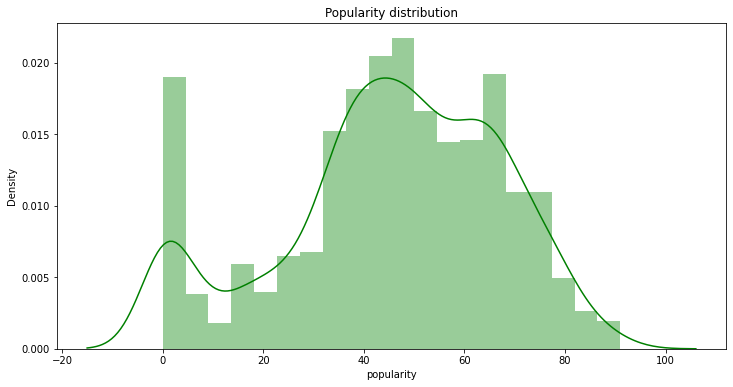

In [13]:
# Popularity distribution

plt.figure(figsize=(12, 6))
sns.distplot(df.popularity, bins=20, hist=True, color='g')
plt.title('Popularity distribution')
plt.savefig('{path}/popularity distribution'.format(path=path))

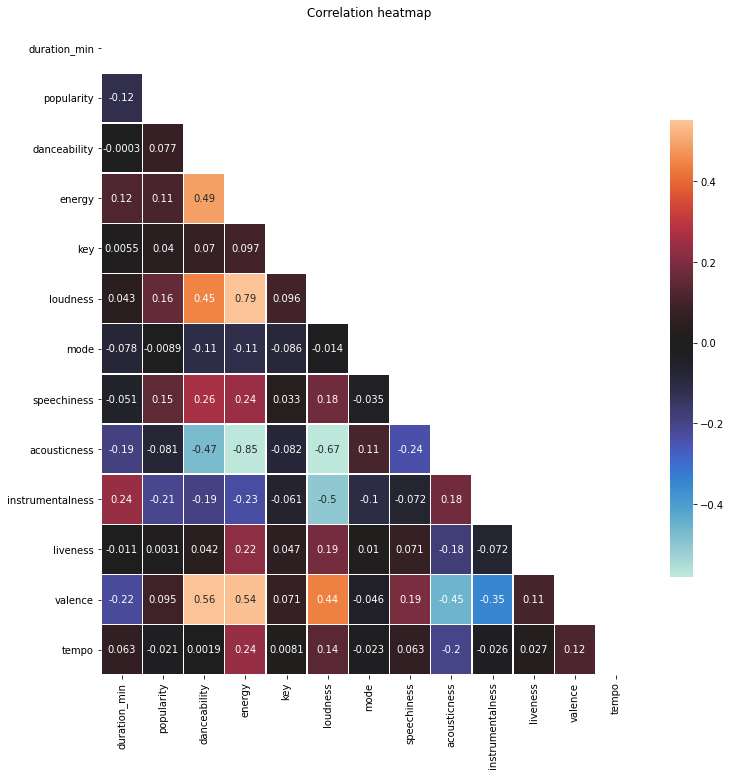

In [14]:
# Correlation map
plt.figure(figsize=(12,12))
df_hm = df.corr()

mask = np.triu(np.ones_like(df_hm, dtype=bool))

sns.heatmap(df_hm, annot=True, robust=True, mask=mask, center=0, linewidths=0.5, cbar_kws={"shrink": .7})
plt.title('Correlation heatmap')
plt.savefig('{path}/heatmap'.format(path=path))

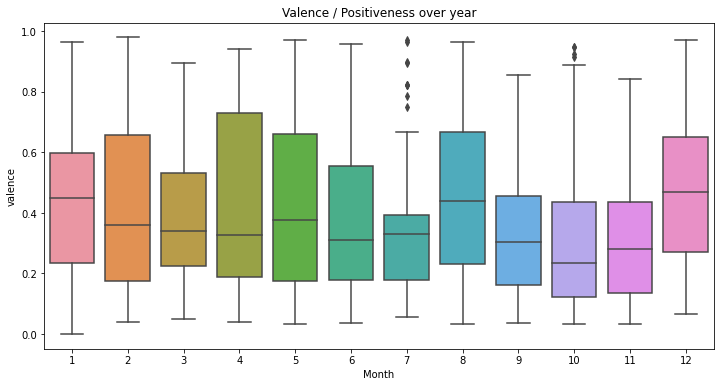

In [15]:
# Acousticness and instrumentalness by time
df['added_at'] = pd.to_datetime(df['added_at'], utc=False)

plt.figure(figsize=(12,6))
sns.boxplot(x=df.added_at.dt.month, y=df.valence)
plt.title('Valence / Positiveness over year')
plt.xlabel('Month')
plt.savefig('{path}/valence_positiveness'.format(path=path))

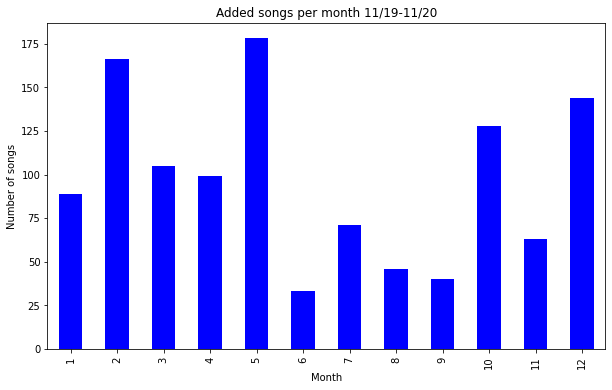

In [16]:
# Number of added songs by month 

addtimes = df[df['added_at'] >= '2019-11-11'].added_at.dt.month.value_counts(sort=False)

plt.figure(figsize=(10,6))
addtimes.plot.bar(color='blue')

plt.xlabel('Month')
plt.title('Added songs per month 11/19-11/20')
plt.ylabel('Number of songs')
plt.savefig('{path}/annual_added_songs'.format(path=path))

Top 5 songs with highest bpm: 
         tempo       name
1115  217.976    Opening
1114  217.976    Opening
1116  217.976    Opening
1117  217.976    Opening
1495  214.041  Moonbeams


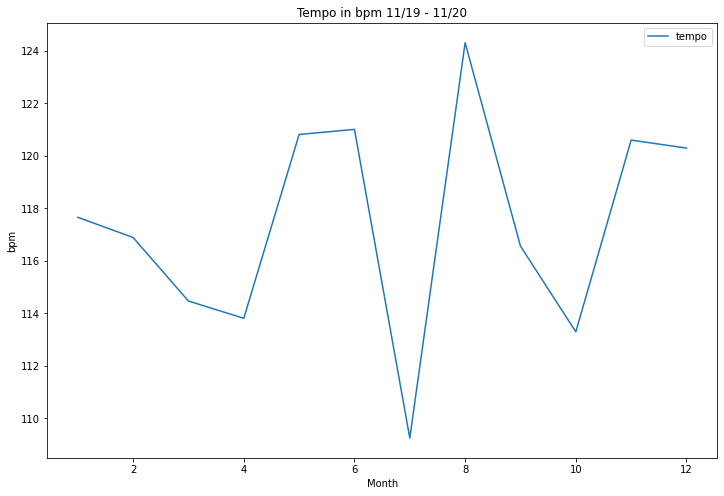

In [17]:
# Analysing tempo development by time 

top10_bpm = df.sort_values(by='tempo', ascending=False).head(5)[['tempo', 'name']]
print('Top 5 songs with highest bpm: \n', top10_bpm)

plt.figure(figsize=(12, 8))
# columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
columns = ['tempo']
for col in columns:
    x = df[df['added_at'] >= '2019-11-11'].groupby(df.added_at.dt.month)[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Tempo in bpm 11/19 - 11/20')
ax.set_ylabel('bpm')
ax.set_xlabel('Month')
ax.legend()
plt.savefig('{path}/annual_tempo_dev'.format(path=path))

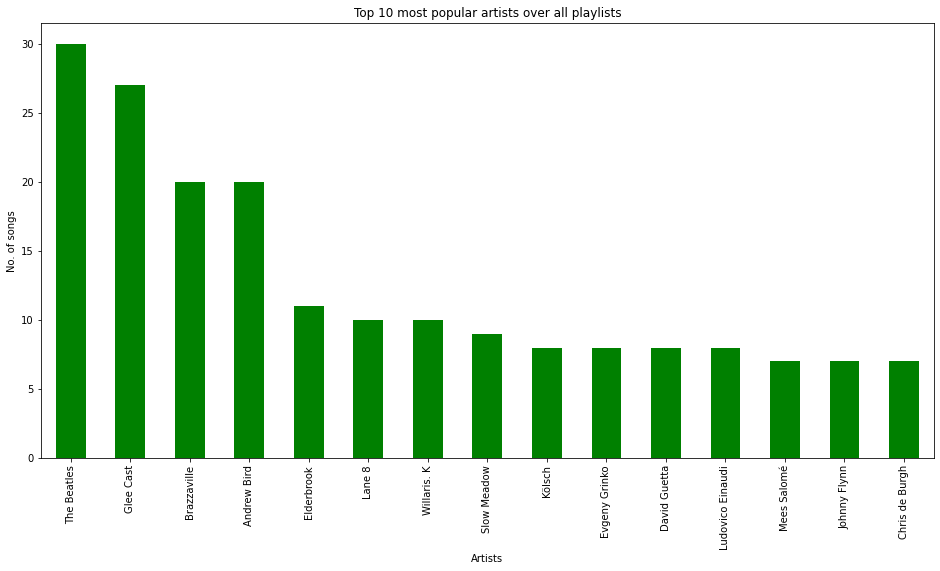

In [18]:
# Top 10 popular artists/bands & their distribution
top10_artist = df.groupby('artist')['track_id'].nunique().sort_values(ascending=False)

if 'Various Artists' in top10_artist:
    top10_artist = top10_artist.drop('Various Artists')

top10_artist.head(15)

plt.figure(figsize=(16,8))
top10_artist.head(15).plot.bar(color='green')
plt.title('Top 10 most popular artists over all playlists')
plt.ylabel('No. of songs')
plt.xlabel('Artists')
plt.savefig('{path}/top10_popular_artists'.format(path=path), bbox_inches='tight')

Relative empty genres:  10.763 %
('pop', 178)
('rock', 166)
('indie folk', 147)
('modern rock', 134)
('pop dance', 126)
('dance pop', 124)
('indie pop', 119)
('stomp and holler', 91)
('indie rock', 91)
('classic rock', 86)
('pop rock', 73)
('tropical house', 69)
('post-teen pop', 68)
('compositional ambient', 64)
('modern alternative rock', 63)


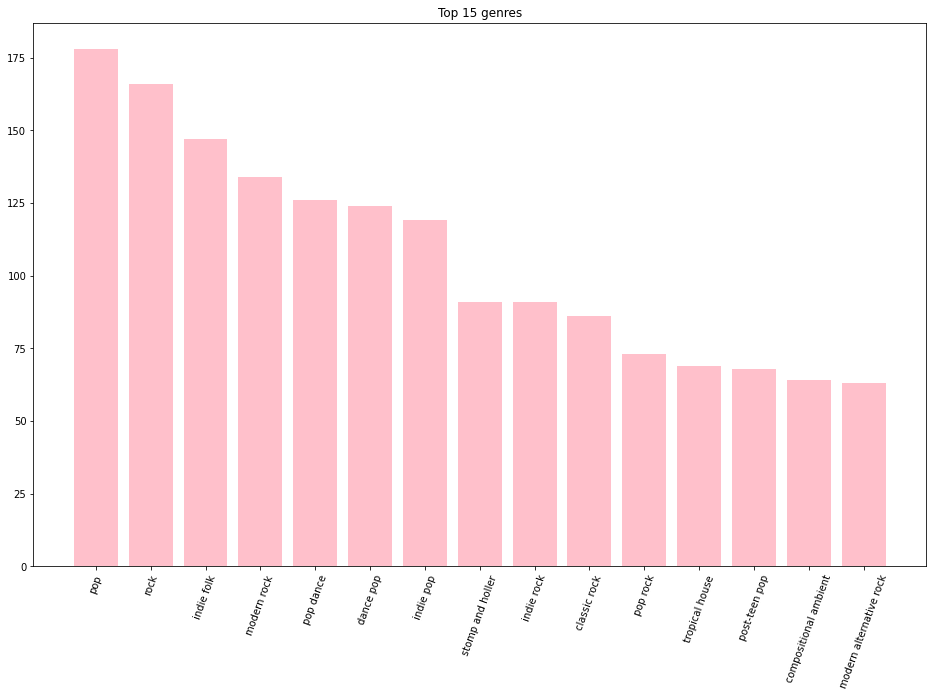

In [19]:
# Analysing genres
# Approach 1

empty_genres = df[df['genres'].str.len() == 0].genres.count().sum()
print('Relative empty genres: ', round(empty_genres * 100 / len(df), 3), '%')

genres_list = []
for x in df.genres:
    for sx in x:
        genres_list.append(sx)       

ctr = Counter(genres_list).most_common(15)
for x in ctr:
    print(x)
    
plt.figure(figsize=(16,10))
plt.bar(range(len(dict(ctr))), list(dict(ctr).values()), tick_label=list(dict(ctr).keys()), align='center', color='pink')
plt.xticks(rotation=70)
plt.title('Top 15 genres')
plt.savefig('{path}/top10_genres'.format(path=path), bbox_inches='tight')

In [20]:
# Approach 2 with tokenization
tokenized = []
for x in [word_tokenize(x) for x in genres_list]:
    for sx in x:
        tokenized.append(sx)

ctr1 = Counter(tokenized).most_common(15)
for x in ctr1:
    print(x)

('pop', 1278)
('rock', 1047)
('indie', 730)
('dance', 312)
('folk', 301)
('house', 284)
('modern', 244)
('alternative', 152)
('classic', 120)
('new', 107)
('ambient', 101)
('stomp', 95)
('and', 93)
('french', 92)
('holler', 91)


C         223
C♯, D♭    142
D         167
D♯, E♭     89
E         105
F         167
F♯, G♭     90
G         154
G♯, A♭    107
A         118
A♯, B♭    108
B         128
Name: key, dtype: int64


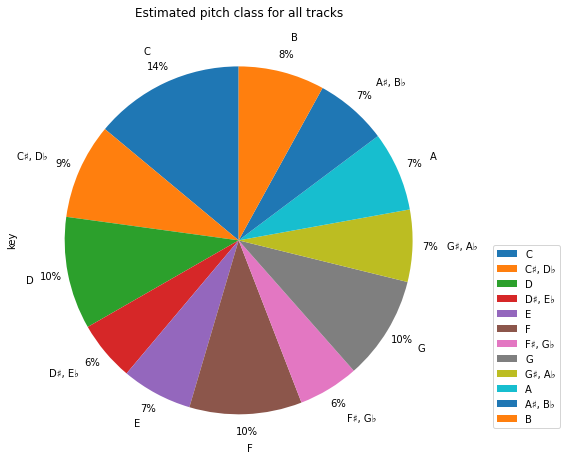

In [21]:
# Keys analysis

pitch_notation = {0:'C', 1:'C♯, D♭', 2:'D', 3:'D♯, E♭', 4:'E', 5:'F', 6:'F♯, G♭', 7:'G', 8:'G♯, A♭', 9:'A', 10:'A♯, B♭', 11:'B'}

kv = df.key.value_counts().sort_index(ascending=True).rename(pitch_notation)
print(kv)
plt.figure(figsize=(10,8))
kv.plot(kind='pie', autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2, startangle=90)
plt.title('Estimated pitch class for all tracks')
plt.colorbar
plt.legend(bbox_to_anchor=(0.75, 0., 0.5, 0.5))
plt.savefig('{path}/pitch_class_distribution'.format(path=path))
plt.show()

d:\apps\python\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


 Slope:  -1.188180947165359 
 Intercept:  1.045772832030885


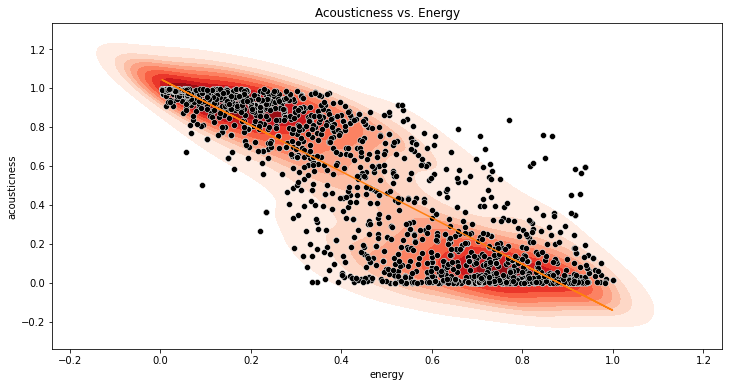

In [22]:
# Energy & Acousticness in scatter plot + regression + Kernel Density Estimation (KDE)
plt.figure(figsize=(12,6))

x = df.energy
y=df.acousticness

sns.kdeplot(y=y, x=x, shade=True, cmap='Reds', shade_lowest=False)
sns.scatterplot(y=y, x=x, color='black')

# Regression line --> Polyfit for extracting scale and 
k,b = np.polyfit(x,y, deg=1)
print(' Slope: ', k, '\n', 'Intercept: ', b)
plt.plot(x, k*x+b)

plt.title('Acousticness vs. Energy')
plt.savefig('{path}/acousticness_energy'.format(path=path))

 Number minor:  586 
 Number major:  1012


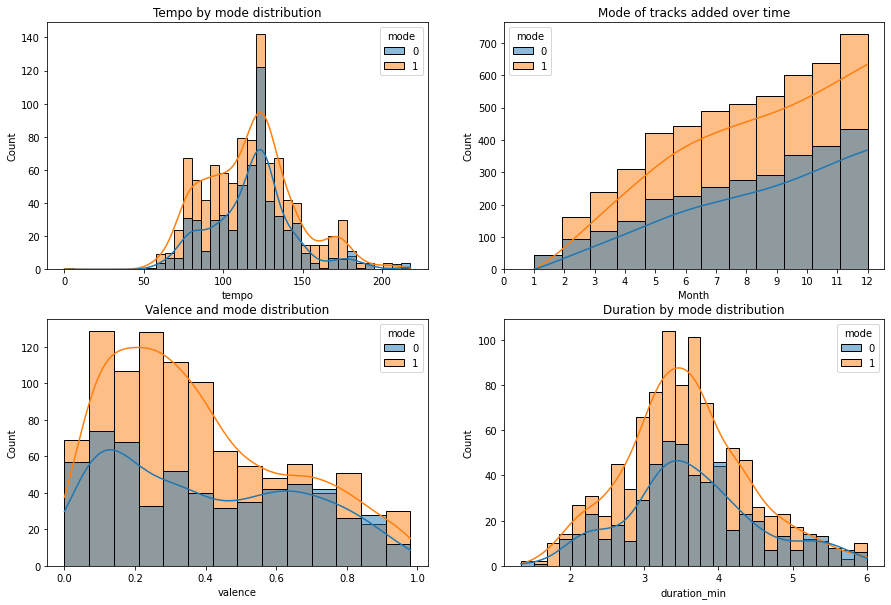

In [23]:
# Major minor distribution (mode)

minor = df.loc[df['mode'] == 0]
major = df.loc[df['mode'] == 1]

print(' Number minor: ', minor['mode'].count(), '\n', 'Number major: ', major['mode'].count())

# sns.histplot(minor.tempo, kde=True, cumulative=True, color='purple', label='Minor')
# sns.histplot(major.tempo, kde=True, cumulative=True, color='red', label='Major')

fig, ax = plt.subplots(2,2, figsize=(15,10), sharey=False)

sns.histplot(data=df, x='tempo', hue='mode', kde=True, legend=True, element='bars', ax=ax[0,0])
ax[0,0].set_title('Tempo by mode distribution')

pure_year = df[df['added_at'] >= '2019-11-11'].added_at.dt.month
sns.histplot(data=df, x=pure_year, hue='mode', kde=True, bins=12, cumulative=True, legend=True, element='bars', ax=ax[0,1])
ax[0,1].set_title('Mode of tracks added over time')
ax[0,1].set_xlabel('Month')
ax[0,1].set_xticks(range(13))

sns.histplot(data=df, x='valence', hue='mode', kde=True, legend=True, element='bars', ax=ax[1,0])
ax[1,0].set_title('Valence and mode distribution')



# Remove outliers from duration --> big influence on distribution visualiation
Q1 = df.duration_min.quantile(0.25)
Q3 = df.duration_min.quantile(0.75)
IQR = Q3- Q1
df_iqr = df[(df['duration_min'] >= (Q1 - 1.5 * IQR)) & (df['duration_min'] <= (Q3 + 1.5 * IQR))]


sns.histplot(data=df_iqr, x='duration_min', hue='mode', kde=True, ax=ax[1,1])
ax[1,1].set_title('Duration by mode distribution')

plt.savefig('{path}/mode_analysis'.format(path=path))
plt.show()